In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Network parameters
alpha = 2 # mV^-1
beta = 0.5 # mV

## 0.1.
> Plot the transfer function g as a function of the potential h. How do α and β affect the shape?

In [22]:
# Define the transfer function
def g(h):
    return 1 / (1 + np.exp(-2 * alpha * (h - beta)))

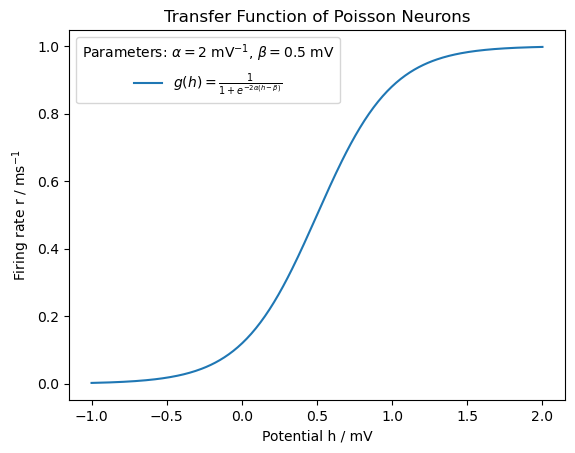

In [16]:



# Generate a range of potential values
h_values = np.linspace(-1, 2, 300)  # Adjust the range as needed

# Calculate the firing rates
r_values = g(h_values)

# Plot the transfer function
plt.plot(h_values, r_values, label=r'$g(h) = \frac{1}{1 + e^{-2\alpha(h - \beta)}}$')

# Add labels and title
plt.xlabel('Potential h / mV')
plt.ylabel(r'Firing rate r / ms$^{{-1}}$')
plt.title('Transfer Function of Poisson Neurons')

# Add the legend with alpha and beta values using LaTeX
plt.legend(title=r'Parameters: $\alpha={}$ mV$^{{-1}}$, $\beta={}$ mV'.format(alpha, beta))

# Display the plot
plt.show()


Certainly! To examine the input-output relationship of Poisson neurons, we can plot the transfer function ( g ) as a function of the potential ( h_i ). The transfer function is given by the sigmoid function:
ri​(t)=r0​⋅g(hi​(t))=1+e−2α(hi​(t)−β)r0​​
Here, ( \alpha ) and ( \beta ) are parameters that affect the shape of the sigmoid function. Specifically:

( \alpha ) determines the steepness of the curve. A higher value of ( \alpha ) makes the transition from the low firing rate to the high firing rate more abrupt.
( \beta ) sets the threshold potential at which the firing rate increases significantly. If ( h_i(t) ) is much less than ( \beta ), the firing rate ( r_i(t) ) will be close to 0. If ( h_i(t) ) is much greater than ( \beta ), the firing rate will approach ( r_0 ).

To visualize this, you can plot ( g(h_i) ) against ( h_i ) for a range of values. The plot will show an S-shaped curve (sigmoid), with the steepness and threshold determined by your chosen values of ( \alpha ) and ( \beta ).

## 0.2.
> Simulate the dynamics of N = 100 unconnected neurons for T = 1000 ms, receiving the slowly
 oscillating input Ii(t) = I0 sin(ωt) with I0 = 2 nA, ω = 10 rad/s, and with all neurons initialised at
 hi(t = 0) = 0 mV.
 • Compare the mean number of spikes per ms across the N neurons to the instantaneous rate r =
 r0g(RI(t)). Explain the difference that you see.
 • Now simulate N = 1000 neurons. Compare again as before, and explain the difference you see

In [45]:
r0 = 1  # ms^-1


N = 100  # Number of neurons
T = 1000  # Total time in ms
dt = 0.1  # Time step in ms
tau = 10  # Time constant in ms
R = 1e6  # Resistance in ohms
I0 = 2e-9  # Input current amplitude in A
omega = 10  # Frequency in rad/s

In [46]:
# Time vector
time = np.arange(0, T, dt)

In [59]:

N=10000

# Initialize variables
h = np.zeros((N, len(time)))  # Potential in mV, for each neuron and time step
spike_counts = np.zeros(N)  # Spike count for each neuron

# Simulation loop
for s, t in enumerate(time):
    I = I0 * np.sin(omega * t)  # Input current
    dh = (-h[:, s-1] + R * I) / tau * dt  # Change in potential
    h[:, s] = h[:, s-1] + dh  # Update potential
    
    r = r0 * g(h[:, s])  # Firing rate
    p_spike = r * dt  # Probability of spike
    spikes = np.random.rand(N) < p_spike  # Determine spikes
    spike_counts += spikes  # Update spike counts

# Results
mean_spikes_per_ms = np.mean(spike_counts) / T
instantaneous_rate = r0 * g(R * I0 * np.sin(omega * time))

# Compare mean number of spikes to instantaneous rate
print(f"Mean number of spikes per ms across the N={N} neurons: {mean_spikes_per_ms}")
print(f"Instantaneous rate r: {np.mean(instantaneous_rate)}")
print(f'Difference: {mean_spikes_per_ms - np.mean(instantaneous_rate)} ms^-1')
print(f'Percentage difference: {100 * abs(mean_spikes_per_ms - np.mean(instantaneous_rate)) / np.mean(instantaneous_rate)}%')


Mean number of spikes per ms across the N=10000 neurons: 0.1192915
Instantaneous rate r: 0.11920436429389575
Difference: 8.713570610424659e-05 ms^-1
Percentage difference: 0.0730977482413441%


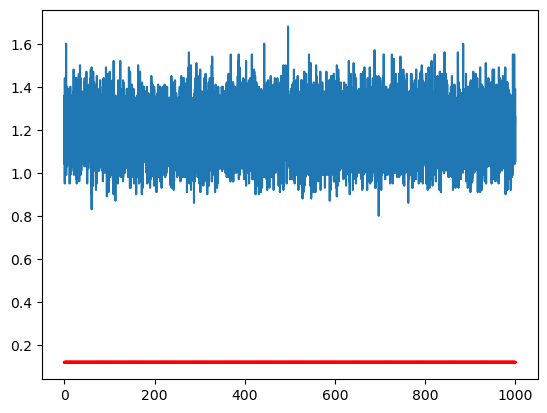

In [72]:
plt.plot(time, spike_counts)
plt.plot(time, instantaneous_rate, c='r', lw=2)

In [30]:
# Explain the difference
# The mean number of spikes per ms across the N neurons may differ from the instantaneous rate due to the stochastic nature of spike generation in the Poisson process. The actual spike count can vary around the expected value given by the rate equation.

# Now simulate N = 1000 neurons
# You can repeat the simulation with N = 1000 and compare the results. With a larger number of neurons, the law of large numbers suggests that the mean spike count should more closely approximate the expected rate, reducing the variability seen in the smaller population.

array([ 0.00000000e+00,  1.68294197e-05,  3.48470740e-05, ...,
       -1.19986416e-05,  7.98080255e-06,  2.06227337e-05])

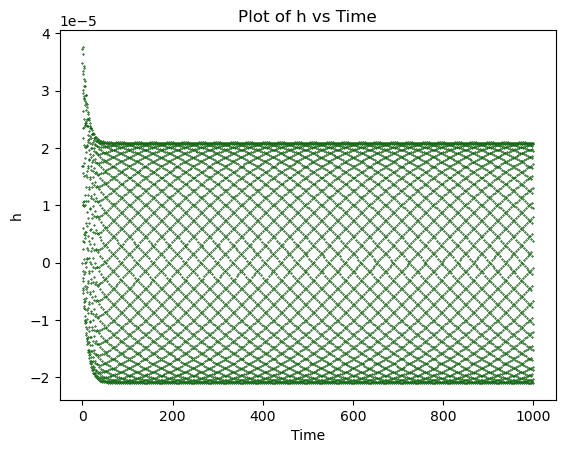

In [38]:
import matplotlib.pyplot as plt

plt.scatter(time, h[0], s=0.1, c='black', label='Neuron 0')
plt.scatter(time, h[1], s=0.1, c='green', label='Neuron 1')
plt.xlabel('Time')
plt.ylabel('h')
plt.title('Plot of h vs Time')
plt.show()

In [61]:
import numpy as np
from scipy.stats import poisson
from tqdm.notebook import tqdm

# Network parameters
alpha = 2  # mV^-1
beta = 0.5  # mV
delta_t = 0.1  # ms
tau = 10  # ms
r0 = 1  # ms^-1
I0 = 2  # nA
omega = 10  # rad/s

# Transfer function
def transfer_function(h):
    return r0 / (1 + np.exp(-2 * alpha * (h - beta)))

# Update rule using forward Euler method
def update_potential(h, I):
    return h + delta_t * (-h + I) / tau

# Simulate neurons
def simulate_neurons(N, T, I0, omega):
    h = np.zeros(N)  # Initialize potentials
    spikes = np.zeros((N, int(T / delta_t)))  # Record spikes
    for step in tqdm(range(int(T / delta_t))):
        t = step * delta_t
        I = I0 * np.sin(omega * t)  # Oscillating input
        r = transfer_function(h)  # Instantaneous mean firing rate
        h = update_potential(h, I)  # Update potentials
        # Generate spikes
        for i in range(N):
            spikes[i, step] = poisson.rvs(r[i] * delta_t)
    return spikes

# Run simulations
N_values = [100]
T = 1000  # Total time in ms
results = {}
for N in N_values:
    print(f"Simulating for N = {N}")
    spikes = simulate_neurons(N, T, I0, omega)
    results[N] = spikes
    # Compare mean number of spikes to instantaneous rate
    mean_spikes = np.mean(spikes, axis=0) / delta_t
    print(f"Mean number of spikes per ms for N = {N}: {mean_spikes}")

# Analyze results
# ... (add your analysis here)



Simulating for N = 100


  0%|          | 0/10000 [00:00<?, ?it/s]

Mean number of spikes per ms for N = 100: [0.  0.  0.2 ... 0.  0.1 0. ]


0.11888